## CNN Model - ALexNet - Covid X-Ray

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset=train.flow_from_directory("//content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train",target_size=(227,227),batch_size=32,class_mode='binary',subset="training")
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train",target_size=(227,227),batch_size=32,class_mode='binary',subset="validation")
test_dataset=test.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/test",target_size=(227,227),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
covid_dir = "/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train/PNEUMONIA"

normal_dir = "/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train/NORMAL"


In [ ]:
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
def show_img(dir,title):
  nrows = 2
  ncols = 4
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)
  pic_index = 10
  fnames = os.listdir( dir )
  next_pix = [os.path.join(dir, fname) 
                  for fname in fnames[ pic_index-8:pic_index] 
                ]
  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.suptitle(title,fontsize = 24)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    img.shape

  plt.show()

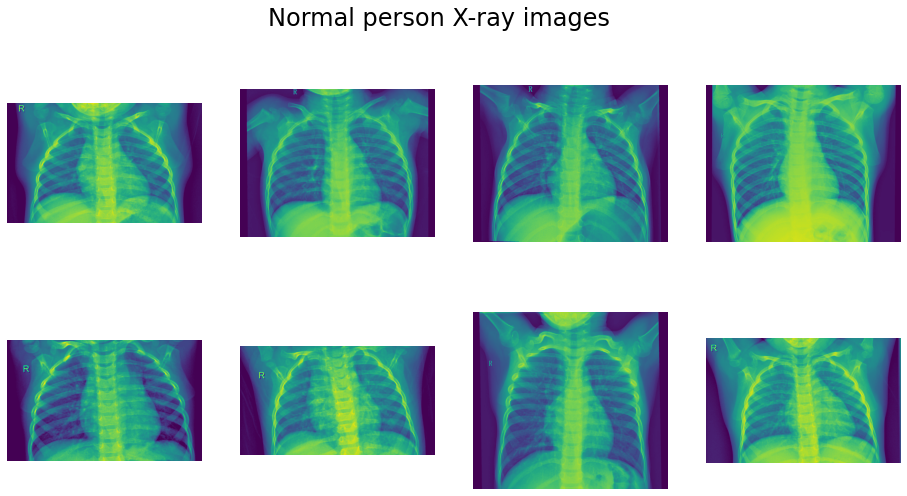

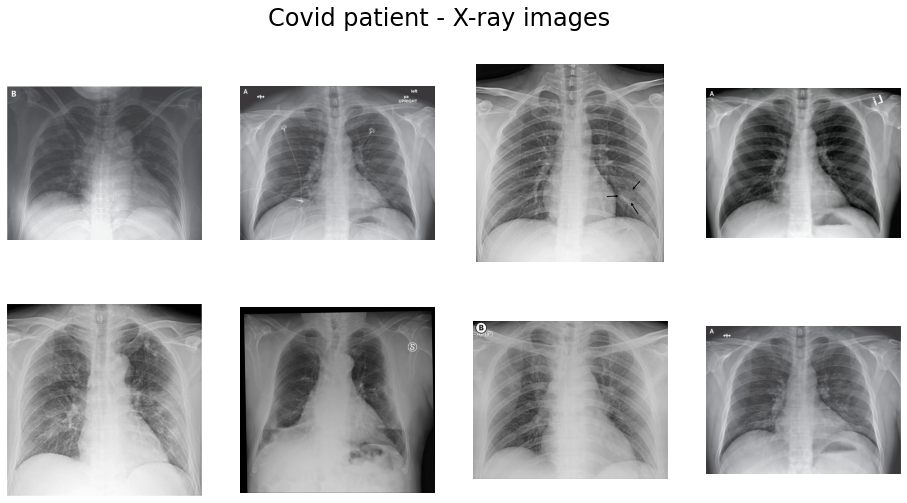

In [ ]:
show_img(normal_dir,"Normal person X-ray images")
show_img(covid_dir,"Covid patient - X-ray images")

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
#build AlexNet model

alex_model=Sequential()
alex_model.add(Conv2D(filters=96,kernel_size=(11,11),padding='valid',strides=(4,4),activation='relu',input_shape=(227,227,3)))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Flatten())
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(1,activation='sigmoid'))

alex_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 384)      

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
alex_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
alex_his=alex_model.fit(train_dataset,batch_size=32,epochs=20,validation_data=valid_dataset)

Epoch 1/20
4/4 [==============================] - 80s 19s/step - loss: 2.3348 - accuracy: 0.5417 - val_loss: 0.6937 - val_accuracy: 0.1786
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.7074 - accuracy: 0.4583 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6939 - accuracy: 0.5083 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6953 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.7193 - accuracy: 0.4167 - val_loss: 0.6914 - val_accuracy: 0.5714
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.6939 - accuracy: 0.5583 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.6856 - accuracy: 0.5000 - val_loss: 0.6593 - val_accuracy: 0.5357
Epoch 8/20
4/4 [=======================

In [ ]:
alex_model.evaluate(test_dataset)

2/2 [==============================] - 7s 6s/step - loss: 0.1199 - accuracy: 0.9500


[0.11992616951465607, 0.949999988079071]

Text(0.5, 1.0, 'Training and validation loss of Alexnet Model in Covid X-RAY Dataset')

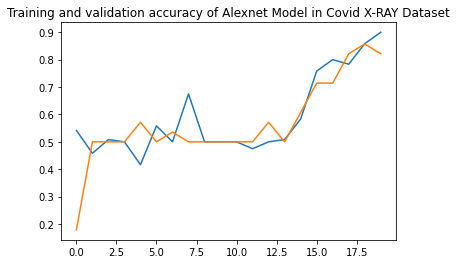

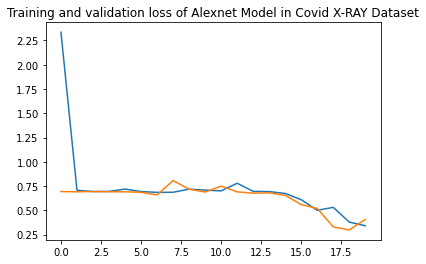

In [ ]:
acc = alex_his.history['accuracy']
val_acc = alex_his.history['val_accuracy']

loss = alex_his.history['loss']
val_loss = alex_his.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of Alexnet Model in Covid X-RAY Dataset')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of Alexnet Model in Covid X-RAY Dataset')